<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/Lab_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Generate a 2D dataset with non-convex clusters


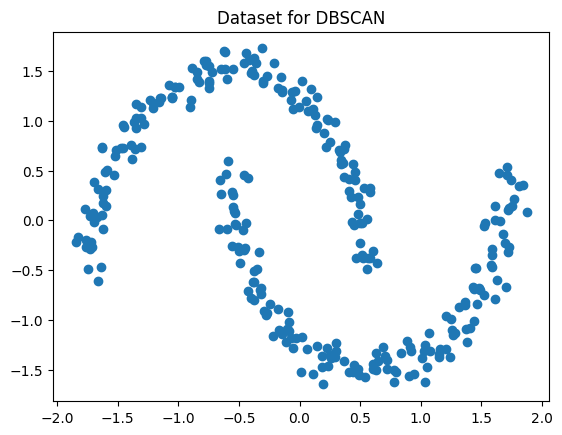

In [20]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Dataset for DBSCAN")
plt.show()

#Applying DBSCAN

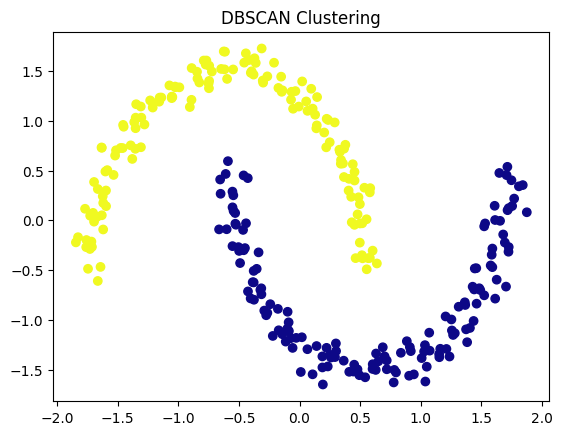

In [9]:

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

#Can you change epsilon and min values to observe how things change? For instance,

* Try eps=0.1, eps=0.5 and observe the difference.
* What happens when you change min_samples to 3 or 10?
* Can you also identify noise for each trial. (Hint: np.sum(labels == -1) after you your clusters)

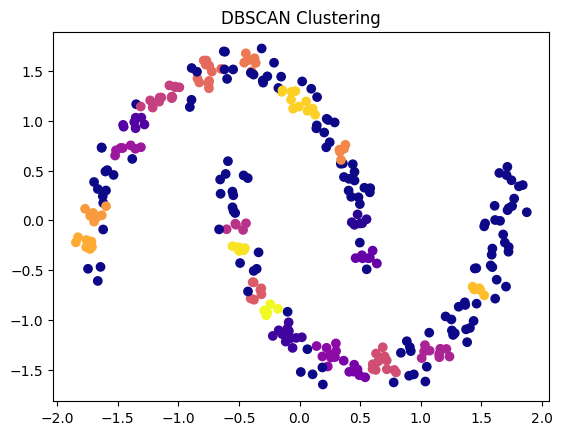

In [10]:

dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

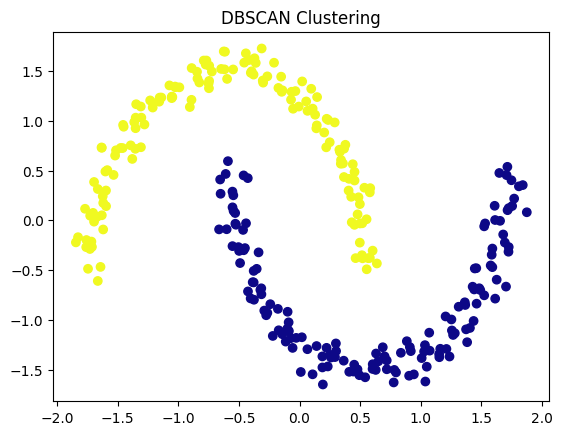

In [11]:

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

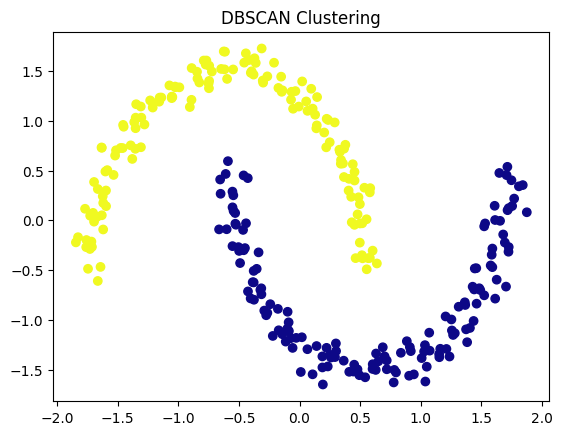

In [12]:

dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

# Plot clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

epsilon determine to related points dmaximum distance this means if a point is cloaser than epsilon to another DBSCAN consider them related smaller epsilon means more and small number of members clusters
min samples determines core points if a point has more neighbors than min samples also closer than epsilon becomes core poiint of cluster

#Use a real dataset:
* Try load_iris() from sklearn.datasets.
* Apply DBSCAN

In [29]:
iris = load_iris()
X=iris.data
y=iris.target
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X)

In [30]:

for epsilon in np.arange(0.1,1,0.05):
    for min_sample in range(1,60):
        db = DBSCAN(eps = epsilon,min_samples=min_sample)
        labels2 = db.fit_predict(X_scaled2)
        n_clusters = len(set(labels2)) - (1 if -1 in labels2 else 0)
        if n_clusters >= 2:
            score = silhouette_score(X, labels2)
            print(f" epsilon : {epsilon} - min_samples : {min_sample} - score : {score}")

 epsilon : 0.1 - min_samples : 1 - score : 0.013333333333333334
 epsilon : 0.15000000000000002 - min_samples : 1 - score : 0.04805632787205718
 epsilon : 0.15000000000000002 - min_samples : 2 - score : -0.5318760723307884
 epsilon : 0.15000000000000002 - min_samples : 3 - score : 0.07266225991572016
 epsilon : 0.20000000000000004 - min_samples : 1 - score : 0.05623143394014504
 epsilon : 0.20000000000000004 - min_samples : 2 - score : -0.46174686865721287
 epsilon : 0.20000000000000004 - min_samples : 3 - score : 0.12485652812514832
 epsilon : 0.20000000000000004 - min_samples : 4 - score : 0.07878719848961557
 epsilon : 0.25000000000000006 - min_samples : 1 - score : 0.0830302584368297
 epsilon : 0.25000000000000006 - min_samples : 2 - score : -0.2942033770937934
 epsilon : 0.25000000000000006 - min_samples : 3 - score : -0.4017758103295667
 epsilon : 0.25000000000000006 - min_samples : 4 - score : 0.20207264174417944
 epsilon : 0.25000000000000006 - min_samples : 5 - score : 0.161862

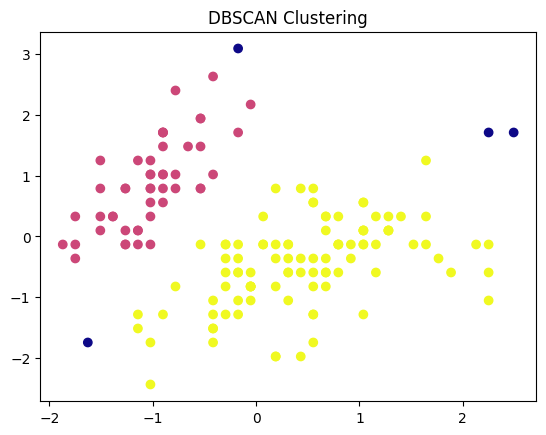

In [31]:
#  i will take eps 0.95 and min samples 8
db = DBSCAN(eps = 0.95,min_samples=8)
labels2 = db.fit_predict(X_scaled2)

plt.scatter(X_scaled2[:, 0], X_scaled2[:, 1], c=labels2, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()